In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import phik 
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor
import optuna
import mlflow
mlflow.set_tracking_uri('./mlruns')
import tempfile
from sklearn.base import clone
import os
import cloudpickle as cp

pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_excel('mold_cost3.xlsx')
df_calc = pd.read_excel('mold_cost_to_calc.xlsx')



In [3]:
# все цены указаны с НДС 

ST_630 = 1400
SM_625 = 1300
resin = 340
hardener = 470
screw = 283
unisil = 1200
unisil_9131 = 920
fiberglass = 1000
ad_100x20x3 = 735
BGB = 14.5



In [4]:
df = df.fillna(0).replace('', 0)
df_calc = df_calc.fillna(0).replace('', 0)

In [5]:
def get_mold_cost(item):
    rc = (item['ToolArt_ST_630'] * ST_630) + (item['ToolArt_SM_625'] * SM_625) + (item['resin'] * resin) + (item['hardener'] * hardener) \
    + (item['screw'] * screw) + (item['unisil'] * unisil) + (item['unisil_9131'] * unisil_9131) + (item['fiberglass'] * fiberglass) + (item['BGB'] * BGB)\
    + (item['ad_31_100x20x3'] * ad_100x20x3 + item['ad_31_50x20x2'] * ad_100x20x3 + item['ad_31_60x20x2'] * ad_100x20x3 + item['ad_31_80x20x2']*ad_100x20x3 )
    return round(rc*1.1)

df['real_cost'] = df.apply(get_mold_cost, axis=1)
df_calc['real_cost'] = df_calc.apply(get_mold_cost, axis=1)




In [6]:
df['S'] = df['mold_len'] * df['mold_wid']
df_calc['S'] = df_calc['mold_len'] * df_calc['mold_wid']

In [7]:
def square(item):
    leng, wid, hi = item['mold_len'] / 100, item['mold_wid'] / 100, item['mold_hi'] / 100
    sq = leng * wid * hi
    return sq

df['square'] = df.apply(square, axis=1)
df_calc['square'] = df_calc.apply(square, axis=1)

def square_1(item):
    leng, wid, hi = item['mold_len'] / 100, item['mold_wid'] / 100, item['mold_hi'] / 100
    sq = leng + wid
    return sq

df['square_1'] = df.apply(square_1, axis=1)
df_calc['square_1'] = df_calc.apply(square_1, axis=1)

def square_2(item):
    leng, wid, hi = item['mold_len'] / 100, item['mold_wid'] / 100, item['mold_hi'] / 100
    sq = leng * (leng + wid)
    return sq

df['square_2'] = df.apply(square_2, axis=1)
df_calc['square_2'] = df_calc.apply(square_2, axis=1)

def square_3(item):
    leng, wid, hi = item['mold_len'] / 100, item['mold_wid'] / 100, item['mold_hi'] / 100
    sq = (leng + wid) * (leng * wid * hi)
    return sq

df['square_3'] = df.apply(square_3, axis=1)
df_calc['square_3'] = df_calc.apply(square_3, axis=1)


def square_4(item):
    leng, wid, hi = item['mold_len'] / 100, item['mold_wid'] / 100, item['mold_hi'] / 100
    sq = (leng * wid * hi)**2
    return sq

df['square_4'] = df.apply(square_4, axis=1)
df_calc['square_4'] = df_calc.apply(square_4, axis=1)

In [8]:
def mold_materials(item):
    
    leng, wid, hi = item['mold_len'] / 100, item['mold_wid'] / 100, item['mold_hi'] / 100
    materials = (
        leng * 459.7
        + wid * 459.7
        + hi * -236.5
        + leng * wid * -55.58
        + (leng + wid) * 919.4
        + (leng * wid * hi) * 76.73
        + leng**2 * 18.55
        + leng * wid * -55.58
        + leng * hi * -24.85
        + leng * leng * wid * 13.11
        + leng * (leng + wid) * -37.02
        + leng * (leng * wid * hi) * -0.8655
        + wid**2 * 18.55
        + wid * hi * -24.85
        + wid * leng * wid * 13.11
        + wid * (leng + wid) * -37.02
        + wid * (leng * wid * hi) * -0.8655
        + hi**2 * 253.4
        + hi * leng * wid * 76.73
        + hi * (leng + wid) * -49.7
        + hi * (leng * wid * hi) * -13.78
        + leng * wid**2 * -3.516
        + leng * wid * (leng + wid) * 26.23
        + leng * wid * (leng * wid * hi) * -0.4826
        + (leng + wid)**2 * -74.05
        + (leng + wid) * (leng * wid * hi) * -1.731
        + (leng * wid * hi)**2 * 0.1059
    )
    
    return round(materials * 1.2)
    
df['mold_materials'] = df.apply(mold_materials, axis=1)
df_calc['mold_materials'] = df_calc.apply(mold_materials, axis=1)

In [9]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['tariff', 'sum_of_tariff', 'mold_len', 'mold_wid', 'mold_hi', 'Power',
       'S', 'ToolArt_ST_630', 'ToolArt_SM_625', 'resin', 'hardener', 'screw',
       'unisil', 'unisil_9131', 'fiberglass', 'ad_31_50x20x2', 'ad_31_60x20x2',
       'ad_31_80x20x2', 'ad_31_100x20x3', 'BGB', 'real_cost', 'square',
       'square_1', 'square_2', 'square_3', 'square_4', 'mold_materials'],
      dtype='object')

In [10]:
X = df.drop(columns=['Name ','tariff','real_cost','mold_materials'])[['mold_len','mold_hi','mold_wid','square','square_1','square_2','S','Power','sum_of_tariff','square_3','square_4']]
y = df['real_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)



In [11]:
# ohe_cols = ['CLASS']
# ohe_cols2= ['Gender']
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [12]:


num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    ('num_cols', num_pipe, num_cols)
])
model_xgb = Pipeline([
    ('transform', transform),
    ('model', xgb.XGBRegressor(subsample=0.9933982605910191,max_depth=6,max_child_weight=8,gamma=1,reg_lambda=0))
])


# model = Pipeline([
#     ('transform', transform),
#     ('model', RandomForestClassifier())
#     # ('model', DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=18, ccp_alpha=0.00002))
# ])


In [13]:

num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    ('num_cols', num_pipe, num_cols)
])
model_lgb = Pipeline([
    ('transform', transform),
    ('model', lgb.LGBMRegressor())
])

In [14]:
# ohe_pipe2 = Pipeline([
#     ('ohe2',OneHotEncoder(sparse_output=False))
# ])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    # ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])
model_cbc = Pipeline([
    ('transform', transform),
    ('model', CatBoostRegressor())
])

In [15]:
def objective(trial):
    params = {
        'model__n_estimators': trial.suggest_int('model__n_estimators', 100, 1000),
        'model__max_depth': trial.suggest_int('model__max_depth', 3, 10),
        'model__learning_rate': trial.suggest_float('model__learning_rate', 0.01, 0.1),
    }
    transform = ColumnTransformer([
        ('num_cols', num_pipe, num_cols)
    ],remainder='passthrough')

    model_cbc = Pipeline([
        ('transform', transform),
        ('model', CatBoostRegressor())
    ])
    model_cbc.set_params(**params)
    model_cbc.fit(X_train, y_train)
    pred_cbc = model_cbc.predict(X_test)
    mape_cbc = (abs(y_test-pred_cbc)/(y_test+1)).mean()
    return mape_cbc
study_cbc = optuna.create_study(direction='minimize')
study_cbc.optimize(objective, n_trials=20)



[I 2025-10-20 22:40:09,471] A new study created in memory with name: no-name-147e97f6-61e8-48ee-a222-532c9b65f428


[I 2025-10-20 22:40:09,790] Trial 0 finished with value: 0.42247133111902097 and parameters: {'model__n_estimators': 230, 'model__max_depth': 5, 'model__learning_rate': 0.029919070413069605}. Best is trial 0 with value: 0.42247133111902097.


0:	learn: 11258.5570958	total: 112ms	remaining: 25.6s
1:	learn: 11077.1435865	total: 112ms	remaining: 12.8s
2:	learn: 10909.9280306	total: 113ms	remaining: 8.52s
3:	learn: 10737.7390303	total: 113ms	remaining: 6.37s
4:	learn: 10605.3545839	total: 113ms	remaining: 5.09s
5:	learn: 10466.1681150	total: 113ms	remaining: 4.23s
6:	learn: 10310.2098222	total: 114ms	remaining: 3.62s
7:	learn: 10177.0484021	total: 114ms	remaining: 3.16s
8:	learn: 10037.6762344	total: 114ms	remaining: 2.8s
9:	learn: 9912.3296093	total: 114ms	remaining: 2.52s
10:	learn: 9766.5512863	total: 115ms	remaining: 2.28s
11:	learn: 9657.5517998	total: 116ms	remaining: 2.11s
12:	learn: 9524.9730269	total: 116ms	remaining: 1.94s
13:	learn: 9394.3581461	total: 116ms	remaining: 1.8s
14:	learn: 9273.3860338	total: 117ms	remaining: 1.67s
15:	learn: 9160.0151786	total: 117ms	remaining: 1.56s
16:	learn: 9044.0424344	total: 117ms	remaining: 1.47s
17:	learn: 8933.8576894	total: 118ms	remaining: 1.38s
18:	learn: 8822.7515931	total: 

[I 2025-10-20 22:40:10,009] Trial 1 finished with value: 0.4027673347802782 and parameters: {'model__n_estimators': 609, 'model__max_depth': 3, 'model__learning_rate': 0.02391728353131997}. Best is trial 1 with value: 0.4027673347802782.


232:	learn: 2831.8135386	total: 45.6ms	remaining: 73.5ms
233:	learn: 2824.5811498	total: 45.8ms	remaining: 73.3ms
234:	learn: 2817.4769337	total: 45.9ms	remaining: 73.1ms
235:	learn: 2808.4777395	total: 46.1ms	remaining: 72.8ms
236:	learn: 2795.4534227	total: 46.3ms	remaining: 72.6ms
237:	learn: 2785.1019237	total: 46.4ms	remaining: 72.4ms
238:	learn: 2776.9086483	total: 46.6ms	remaining: 72.1ms
239:	learn: 2770.2466685	total: 46.8ms	remaining: 71.9ms
240:	learn: 2762.4802381	total: 46.9ms	remaining: 71.6ms
241:	learn: 2755.3462438	total: 47.1ms	remaining: 71.4ms
242:	learn: 2735.9205365	total: 47.2ms	remaining: 71.1ms
243:	learn: 2717.7717853	total: 47.4ms	remaining: 70.9ms
244:	learn: 2700.3856844	total: 47.6ms	remaining: 70.7ms
245:	learn: 2691.0200023	total: 47.7ms	remaining: 70.4ms
246:	learn: 2684.3871508	total: 47.9ms	remaining: 70.2ms
247:	learn: 2677.4231892	total: 48.1ms	remaining: 70ms
248:	learn: 2661.9950028	total: 48.2ms	remaining: 69.7ms
249:	learn: 2654.9668058	total: 4

[I 2025-10-20 22:40:10,356] Trial 2 finished with value: 0.39360853991132566 and parameters: {'model__n_estimators': 889, 'model__max_depth': 4, 'model__learning_rate': 0.0929223753307365}. Best is trial 2 with value: 0.39360853991132566.


747:	learn: 2.5500624	total: 188ms	remaining: 35.4ms
748:	learn: 2.5283215	total: 188ms	remaining: 35.2ms
749:	learn: 2.5200892	total: 189ms	remaining: 35ms
750:	learn: 2.4840006	total: 189ms	remaining: 34.7ms
751:	learn: 2.4695760	total: 189ms	remaining: 34.4ms
752:	learn: 2.4557836	total: 189ms	remaining: 34.2ms
753:	learn: 2.4478012	total: 189ms	remaining: 33.9ms
754:	learn: 2.4345707	total: 190ms	remaining: 33.6ms
755:	learn: 2.4230569	total: 190ms	remaining: 33.4ms
756:	learn: 2.3984165	total: 190ms	remaining: 33.2ms
757:	learn: 2.3863087	total: 191ms	remaining: 32.9ms
758:	learn: 2.3587760	total: 191ms	remaining: 32.7ms
759:	learn: 2.3291106	total: 191ms	remaining: 32.4ms
760:	learn: 2.3216416	total: 191ms	remaining: 32.2ms
761:	learn: 2.3091024	total: 191ms	remaining: 31.9ms
762:	learn: 2.2958874	total: 192ms	remaining: 31.7ms
763:	learn: 2.2886463	total: 192ms	remaining: 31.4ms
764:	learn: 2.2610515	total: 192ms	remaining: 31.1ms
765:	learn: 2.2483263	total: 192ms	remaining: 30

[I 2025-10-20 22:40:11,279] Trial 3 finished with value: 0.4355683166477157 and parameters: {'model__n_estimators': 438, 'model__max_depth': 10, 'model__learning_rate': 0.050171842283685195}. Best is trial 2 with value: 0.39360853991132566.


387:	learn: 66.2635295	total: 644ms	remaining: 83ms
388:	learn: 65.5582466	total: 646ms	remaining: 81.4ms
389:	learn: 64.7539740	total: 648ms	remaining: 79.8ms
390:	learn: 64.0993454	total: 650ms	remaining: 78.2ms
391:	learn: 63.3202690	total: 652ms	remaining: 76.6ms
392:	learn: 62.5522291	total: 654ms	remaining: 74.9ms
393:	learn: 61.7910795	total: 657ms	remaining: 73.4ms
394:	learn: 61.0409138	total: 659ms	remaining: 71.7ms
395:	learn: 60.3015777	total: 661ms	remaining: 70.1ms
396:	learn: 59.5729194	total: 663ms	remaining: 68.5ms
397:	learn: 58.8196984	total: 666ms	remaining: 66.9ms
398:	learn: 58.2278453	total: 667ms	remaining: 65.2ms
399:	learn: 57.4944454	total: 670ms	remaining: 63.6ms
400:	learn: 56.7717780	total: 672ms	remaining: 62ms
401:	learn: 56.0596844	total: 674ms	remaining: 60.4ms
402:	learn: 55.3580084	total: 677ms	remaining: 58.8ms
403:	learn: 54.6665968	total: 679ms	remaining: 57.1ms
404:	learn: 53.9852990	total: 682ms	remaining: 55.5ms
405:	learn: 53.3139670	total: 68

[I 2025-10-20 22:40:11,493] Trial 4 finished with value: 0.4295595432557148 and parameters: {'model__n_estimators': 323, 'model__max_depth': 6, 'model__learning_rate': 0.06357182276913505}. Best is trial 2 with value: 0.39360853991132566.


0:	learn: 11092.6103260	total: 598us	remaining: 193ms
1:	learn: 10728.8315006	total: 950us	remaining: 153ms
2:	learn: 10455.1079844	total: 1.37ms	remaining: 146ms
3:	learn: 10205.2569853	total: 2.51ms	remaining: 200ms
4:	learn: 9881.6288418	total: 2.94ms	remaining: 187ms
5:	learn: 9616.5253476	total: 3.31ms	remaining: 175ms
6:	learn: 9358.0623473	total: 3.73ms	remaining: 168ms
7:	learn: 9127.1395915	total: 4.16ms	remaining: 164ms
8:	learn: 8856.9550406	total: 4.41ms	remaining: 154ms
9:	learn: 8680.0536294	total: 4.89ms	remaining: 153ms
10:	learn: 8455.1628291	total: 5.25ms	remaining: 149ms
11:	learn: 8244.7173059	total: 5.58ms	remaining: 145ms
12:	learn: 8037.1924462	total: 5.88ms	remaining: 140ms
13:	learn: 7851.7718138	total: 6.22ms	remaining: 137ms
14:	learn: 7663.8838740	total: 6.67ms	remaining: 137ms
15:	learn: 7439.3812597	total: 7.03ms	remaining: 135ms
16:	learn: 7272.9039691	total: 7.44ms	remaining: 134ms
17:	learn: 7105.9350563	total: 7.81ms	remaining: 132ms
18:	learn: 6946.52

[I 2025-10-20 22:40:11,709] Trial 5 finished with value: 0.44944317931896755 and parameters: {'model__n_estimators': 267, 'model__max_depth': 7, 'model__learning_rate': 0.09256649050763802}. Best is trial 2 with value: 0.39360853991132566.


0:	learn: 10948.7279595	total: 1ms	remaining: 267ms
1:	learn: 10431.1866013	total: 1.5ms	remaining: 199ms
2:	learn: 10017.7268681	total: 1.79ms	remaining: 157ms
3:	learn: 9693.1803414	total: 2.17ms	remaining: 143ms
4:	learn: 9348.9792536	total: 2.53ms	remaining: 133ms
5:	learn: 9065.7195324	total: 2.92ms	remaining: 127ms
6:	learn: 8715.1231329	total: 3.07ms	remaining: 114ms
7:	learn: 8349.6354490	total: 3.54ms	remaining: 115ms
8:	learn: 7990.8431247	total: 3.95ms	remaining: 113ms
9:	learn: 7708.9383654	total: 4.4ms	remaining: 113ms
10:	learn: 7462.7843171	total: 5ms	remaining: 116ms
11:	learn: 7170.0114789	total: 5.64ms	remaining: 120ms
12:	learn: 6941.9882751	total: 6.04ms	remaining: 118ms
13:	learn: 6687.9969041	total: 6.43ms	remaining: 116ms
14:	learn: 6489.0093509	total: 6.84ms	remaining: 115ms
15:	learn: 6307.0457132	total: 7.28ms	remaining: 114ms
16:	learn: 6114.6367464	total: 7.83ms	remaining: 115ms
17:	learn: 5929.8573206	total: 8.39ms	remaining: 116ms
18:	learn: 5779.0318836	t

[I 2025-10-20 22:40:11,958] Trial 6 finished with value: 0.4259140590609554 and parameters: {'model__n_estimators': 702, 'model__max_depth': 3, 'model__learning_rate': 0.0715430829423541}. Best is trial 2 with value: 0.39360853991132566.
[I 2025-10-20 22:40:12,157] Trial 7 finished with value: 0.4357311028391564 and parameters: {'model__n_estimators': 367, 'model__max_depth': 5, 'model__learning_rate': 0.0979853838490751}. Best is trial 2 with value: 0.39360853991132566.


0:	learn: 10915.9630286	total: 413us	remaining: 151ms
1:	learn: 10352.4312589	total: 827us	remaining: 151ms
2:	learn: 9861.0937150	total: 1.09ms	remaining: 132ms
3:	learn: 9373.2075040	total: 1.31ms	remaining: 119ms
4:	learn: 9024.3630458	total: 1.75ms	remaining: 127ms
5:	learn: 8671.0092092	total: 2.66ms	remaining: 160ms
6:	learn: 8282.4827948	total: 3.01ms	remaining: 155ms
7:	learn: 7972.6231719	total: 3.31ms	remaining: 148ms
8:	learn: 7664.7297381	total: 3.56ms	remaining: 142ms
9:	learn: 7406.7426258	total: 3.8ms	remaining: 136ms
10:	learn: 7126.9791840	total: 4ms	remaining: 130ms
11:	learn: 6938.5479982	total: 4.24ms	remaining: 125ms
12:	learn: 6707.6357945	total: 4.45ms	remaining: 121ms
13:	learn: 6479.1845139	total: 4.7ms	remaining: 118ms
14:	learn: 6261.8001956	total: 4.95ms	remaining: 116ms
15:	learn: 6084.2193274	total: 5.2ms	remaining: 114ms
16:	learn: 5906.8128719	total: 5.47ms	remaining: 113ms
17:	learn: 5764.1653178	total: 5.72ms	remaining: 111ms
18:	learn: 5622.0928205	to

[I 2025-10-20 22:40:12,485] Trial 8 finished with value: 0.37112383198284987 and parameters: {'model__n_estimators': 765, 'model__max_depth': 4, 'model__learning_rate': 0.08854946379550548}. Best is trial 8 with value: 0.37112383198284987.


560:	learn: 14.0284736	total: 159ms	remaining: 57.7ms
561:	learn: 13.8971081	total: 159ms	remaining: 57.6ms
562:	learn: 13.7314828	total: 160ms	remaining: 57.3ms
563:	learn: 13.6296215	total: 160ms	remaining: 57ms
564:	learn: 13.4834833	total: 160ms	remaining: 56.7ms
565:	learn: 13.3844091	total: 160ms	remaining: 56.4ms
566:	learn: 13.3304382	total: 161ms	remaining: 56.1ms
567:	learn: 13.2080253	total: 161ms	remaining: 55.8ms
568:	learn: 13.0922158	total: 161ms	remaining: 55.5ms
569:	learn: 12.8974365	total: 161ms	remaining: 55.2ms
570:	learn: 12.8477316	total: 162ms	remaining: 54.9ms
571:	learn: 12.6861586	total: 162ms	remaining: 54.6ms
572:	learn: 12.6377845	total: 162ms	remaining: 54.3ms
573:	learn: 12.5334239	total: 162ms	remaining: 54ms
574:	learn: 12.4253012	total: 162ms	remaining: 53.7ms
575:	learn: 12.3808681	total: 163ms	remaining: 53.4ms
576:	learn: 12.1767555	total: 163ms	remaining: 53.1ms
577:	learn: 12.1335662	total: 163ms	remaining: 52.8ms
578:	learn: 12.0389524	total: 16

[I 2025-10-20 22:40:13,310] Trial 9 finished with value: 0.42210617041945114 and parameters: {'model__n_estimators': 657, 'model__max_depth': 9, 'model__learning_rate': 0.0703308593347831}. Best is trial 8 with value: 0.37112383198284987.


642:	learn: 0.2566413	total: 640ms	remaining: 13.9ms
643:	learn: 0.2543386	total: 641ms	remaining: 12.9ms
644:	learn: 0.2509117	total: 642ms	remaining: 11.9ms
645:	learn: 0.2486809	total: 643ms	remaining: 10.9ms
646:	learn: 0.2465119	total: 644ms	remaining: 9.95ms
647:	learn: 0.2432428	total: 645ms	remaining: 8.96ms
648:	learn: 0.2397739	total: 646ms	remaining: 7.96ms
649:	learn: 0.2377085	total: 647ms	remaining: 6.96ms
650:	learn: 0.2357004	total: 648ms	remaining: 5.97ms
651:	learn: 0.2323743	total: 649ms	remaining: 4.98ms
652:	learn: 0.2291107	total: 650ms	remaining: 3.98ms
653:	learn: 0.2272219	total: 651ms	remaining: 2.98ms
654:	learn: 0.2240651	total: 652ms	remaining: 1.99ms
655:	learn: 0.2209822	total: 653ms	remaining: 995us
656:	learn: 0.2177690	total: 654ms	remaining: 0us
0:	learn: 11209.5614936	total: 539us	remaining: 515ms
1:	learn: 10981.0681200	total: 1.25ms	remaining: 598ms
2:	learn: 10817.6474386	total: 2.03ms	remaining: 644ms
3:	learn: 10612.4280388	total: 2.72ms	remaini

[I 2025-10-20 22:40:14,142] Trial 10 finished with value: 0.4222618661332661 and parameters: {'model__n_estimators': 955, 'model__max_depth': 8, 'model__learning_rate': 0.040102486164657336}. Best is trial 8 with value: 0.37112383198284987.


891:	learn: 4.9742778	total: 603ms	remaining: 42.6ms
892:	learn: 4.9484731	total: 603ms	remaining: 41.9ms
893:	learn: 4.9261708	total: 604ms	remaining: 41.2ms
894:	learn: 4.8889843	total: 605ms	remaining: 40.5ms
895:	learn: 4.8670805	total: 605ms	remaining: 39.9ms
896:	learn: 4.8304403	total: 606ms	remaining: 39.2ms
897:	learn: 4.7969801	total: 607ms	remaining: 38.5ms
898:	learn: 4.7725332	total: 607ms	remaining: 37.8ms
899:	learn: 4.7491845	total: 608ms	remaining: 37.1ms
900:	learn: 4.7133826	total: 609ms	remaining: 36.5ms
901:	learn: 4.6810084	total: 609ms	remaining: 35.8ms
902:	learn: 4.6515117	total: 610ms	remaining: 35.1ms
903:	learn: 4.6158086	total: 611ms	remaining: 34.4ms
904:	learn: 4.5933232	total: 611ms	remaining: 33.8ms
905:	learn: 4.5648245	total: 612ms	remaining: 33.1ms
906:	learn: 4.5298510	total: 612ms	remaining: 32.4ms
907:	learn: 4.5073423	total: 613ms	remaining: 31.7ms
908:	learn: 4.4711066	total: 613ms	remaining: 31ms
909:	learn: 4.4376378	total: 614ms	remaining: 30

[I 2025-10-20 22:40:14,492] Trial 11 finished with value: 0.39399529598425737 and parameters: {'model__n_estimators': 895, 'model__max_depth': 4, 'model__learning_rate': 0.08305325165515541}. Best is trial 8 with value: 0.37112383198284987.


873:	learn: 2.5573375	total: 217ms	remaining: 5.21ms
874:	learn: 2.5509476	total: 217ms	remaining: 4.97ms
875:	learn: 2.5331883	total: 218ms	remaining: 4.72ms
876:	learn: 2.5128718	total: 218ms	remaining: 4.48ms
877:	learn: 2.5006264	total: 218ms	remaining: 4.23ms
878:	learn: 2.4882551	total: 219ms	remaining: 3.98ms
879:	learn: 2.4820866	total: 219ms	remaining: 3.73ms
880:	learn: 2.4744319	total: 219ms	remaining: 3.48ms
881:	learn: 2.4411586	total: 220ms	remaining: 3.24ms
882:	learn: 2.4351430	total: 220ms	remaining: 2.99ms
883:	learn: 2.4276538	total: 220ms	remaining: 2.74ms
884:	learn: 2.4204506	total: 220ms	remaining: 2.49ms
885:	learn: 2.4146091	total: 221ms	remaining: 2.24ms
886:	learn: 2.3918197	total: 221ms	remaining: 1.99ms
887:	learn: 2.3735738	total: 221ms	remaining: 1.74ms
888:	learn: 2.3421550	total: 221ms	remaining: 1.49ms
889:	learn: 2.3260670	total: 222ms	remaining: 1.25ms
890:	learn: 2.3047164	total: 222ms	remaining: 995us
891:	learn: 2.2957547	total: 222ms	remaining: 7

[I 2025-10-20 22:40:14,846] Trial 12 finished with value: 0.45563373531065565 and parameters: {'model__n_estimators': 793, 'model__max_depth': 5, 'model__learning_rate': 0.08350048274101558}. Best is trial 8 with value: 0.37112383198284987.


0:	learn: 10919.3761764	total: 360us	remaining: 303ms
1:	learn: 10438.2475130	total: 894us	remaining: 375ms
2:	learn: 9997.5142928	total: 2.07ms	remaining: 578ms
3:	learn: 9663.1189695	total: 2.38ms	remaining: 498ms
4:	learn: 9326.2600109	total: 2.68ms	remaining: 448ms
5:	learn: 8984.5297422	total: 2.9ms	remaining: 404ms
6:	learn: 8658.1760263	total: 3.13ms	remaining: 373ms
7:	learn: 8345.2938875	total: 3.41ms	remaining: 356ms
8:	learn: 8083.3235726	total: 3.67ms	remaining: 339ms
9:	learn: 7806.9830736	total: 3.86ms	remaining: 321ms
10:	learn: 7515.6683020	total: 4.11ms	remaining: 310ms
11:	learn: 7243.4839217	total: 4.29ms	remaining: 296ms
12:	learn: 7003.4986371	total: 4.5ms	remaining: 287ms
13:	learn: 6796.3132712	total: 4.86ms	remaining: 287ms
14:	learn: 6582.3766454	total: 5.1ms	remaining: 281ms
15:	learn: 6431.1909057	total: 5.3ms	remaining: 274ms
16:	learn: 6245.6646077	total: 5.66ms	remaining: 274ms
17:	learn: 6067.6196686	total: 5.91ms	remaining: 270ms
18:	learn: 5911.3932378	

[I 2025-10-20 22:40:15,182] Trial 13 finished with value: 0.3870960347596669 and parameters: {'model__n_estimators': 841, 'model__max_depth': 4, 'model__learning_rate': 0.08386404468075442}. Best is trial 8 with value: 0.37112383198284987.


644:	learn: 8.9162416	total: 162ms	remaining: 49.3ms
645:	learn: 8.8178136	total: 163ms	remaining: 49.1ms
646:	learn: 8.7472916	total: 163ms	remaining: 49ms
647:	learn: 8.6598709	total: 164ms	remaining: 48.8ms
648:	learn: 8.6226361	total: 164ms	remaining: 48.5ms
649:	learn: 8.5929953	total: 164ms	remaining: 48.3ms
650:	learn: 8.5262999	total: 165ms	remaining: 48ms
651:	learn: 8.4930278	total: 165ms	remaining: 47.8ms
652:	learn: 8.4371980	total: 165ms	remaining: 47.5ms
653:	learn: 8.3575956	total: 165ms	remaining: 47.2ms
654:	learn: 8.2939364	total: 165ms	remaining: 46.9ms
655:	learn: 8.2038181	total: 165ms	remaining: 46.7ms
656:	learn: 8.1280379	total: 166ms	remaining: 46.4ms
657:	learn: 8.0998889	total: 166ms	remaining: 46.1ms
658:	learn: 7.9467634	total: 166ms	remaining: 45.9ms
659:	learn: 7.9202697	total: 166ms	remaining: 45.6ms
660:	learn: 7.8433418	total: 167ms	remaining: 45.4ms
661:	learn: 7.8178453	total: 167ms	remaining: 45.1ms
662:	learn: 7.6763770	total: 167ms	remaining: 44.9

[I 2025-10-20 22:40:15,642] Trial 14 finished with value: 0.4427038067156533 and parameters: {'model__n_estimators': 797, 'model__max_depth': 6, 'model__learning_rate': 0.07957714101869963}. Best is trial 8 with value: 0.37112383198284987.


629:	learn: 2.5154491	total: 245ms	remaining: 65.1ms
630:	learn: 2.4894020	total: 246ms	remaining: 64.7ms
631:	learn: 2.4623051	total: 246ms	remaining: 64.3ms
632:	learn: 2.4488895	total: 247ms	remaining: 63.9ms
633:	learn: 2.4290385	total: 262ms	remaining: 67.4ms
634:	learn: 2.3984325	total: 262ms	remaining: 66.9ms
635:	learn: 2.3692586	total: 263ms	remaining: 66.5ms
636:	learn: 2.3347247	total: 263ms	remaining: 66.1ms
637:	learn: 2.3036480	total: 264ms	remaining: 65.7ms
638:	learn: 2.2743435	total: 264ms	remaining: 65.3ms
639:	learn: 2.2467029	total: 265ms	remaining: 64.9ms
640:	learn: 2.2206244	total: 265ms	remaining: 64.5ms
641:	learn: 2.1972076	total: 265ms	remaining: 64ms
642:	learn: 2.1750348	total: 266ms	remaining: 63.6ms
643:	learn: 2.1626017	total: 266ms	remaining: 63.2ms
644:	learn: 2.1427847	total: 266ms	remaining: 62.7ms
645:	learn: 2.1277436	total: 267ms	remaining: 62.3ms
646:	learn: 2.0956416	total: 267ms	remaining: 61.9ms
647:	learn: 2.0836359	total: 267ms	remaining: 61

[I 2025-10-20 22:40:15,866] Trial 15 finished with value: 0.42578429371824317 and parameters: {'model__n_estimators': 509, 'model__max_depth': 4, 'model__learning_rate': 0.054593590093446144}. Best is trial 8 with value: 0.37112383198284987.


184:	learn: 1066.7460688	total: 47.4ms	remaining: 83ms
185:	learn: 1049.8678009	total: 47.7ms	remaining: 82.8ms
186:	learn: 1037.3797536	total: 47.9ms	remaining: 82.5ms
187:	learn: 1032.5282458	total: 48.2ms	remaining: 82.3ms
188:	learn: 1027.7926437	total: 48.5ms	remaining: 82ms
189:	learn: 1011.9511386	total: 48.7ms	remaining: 81.8ms
190:	learn: 1000.3105411	total: 49ms	remaining: 81.5ms
191:	learn: 995.7778859	total: 49.2ms	remaining: 81.2ms
192:	learn: 991.3537382	total: 49.5ms	remaining: 81ms
193:	learn: 982.9599785	total: 49.7ms	remaining: 80.8ms
194:	learn: 968.1658237	total: 50.2ms	remaining: 80.8ms
195:	learn: 959.7136040	total: 50.5ms	remaining: 80.6ms
196:	learn: 955.5490409	total: 50.8ms	remaining: 80.5ms
197:	learn: 951.4858684	total: 51.2ms	remaining: 80.4ms
198:	learn: 943.7834285	total: 51.5ms	remaining: 80.2ms
199:	learn: 930.7931476	total: 51.8ms	remaining: 80ms
200:	learn: 926.9675017	total: 52.2ms	remaining: 80ms
201:	learn: 919.6273044	total: 52.5ms	remaining: 79.8

[I 2025-10-20 22:40:16,145] Trial 16 finished with value: 0.4094642868381835 and parameters: {'model__n_estimators': 774, 'model__max_depth': 3, 'model__learning_rate': 0.012800817912462355}. Best is trial 8 with value: 0.37112383198284987.


0:	learn: 10912.0651762	total: 732us	remaining: 708ms
1:	learn: 10356.3266358	total: 1.26ms	remaining: 609ms
2:	learn: 9915.0530926	total: 1.58ms	remaining: 508ms
3:	learn: 9569.9337126	total: 1.98ms	remaining: 478ms
4:	learn: 9204.8600983	total: 2.46ms	remaining: 475ms
5:	learn: 8906.4842383	total: 2.92ms	remaining: 468ms
6:	learn: 8539.4796540	total: 3.06ms	remaining: 420ms
7:	learn: 8157.5252176	total: 3.56ms	remaining: 427ms
8:	learn: 7785.4827364	total: 4.05ms	remaining: 431ms
9:	learn: 7493.0822418	total: 4.94ms	remaining: 473ms
10:	learn: 7239.6227482	total: 5.55ms	remaining: 483ms
11:	learn: 6938.9131542	total: 6.08ms	remaining: 485ms
12:	learn: 6707.9428680	total: 6.6ms	remaining: 485ms
13:	learn: 6449.7624208	total: 7.11ms	remaining: 485ms
14:	learn: 6244.4931650	total: 7.65ms	remaining: 486ms
15:	learn: 6060.0530273	total: 8.23ms	remaining: 490ms
16:	learn: 5867.8547871	total: 9.08ms	remaining: 508ms
17:	learn: 5682.7820594	total: 10.1ms	remaining: 533ms
18:	learn: 5535.4598

[I 2025-10-20 22:40:16,787] Trial 17 finished with value: 0.42838291454134103 and parameters: {'model__n_estimators': 968, 'model__max_depth': 7, 'model__learning_rate': 0.09997675692172087}. Best is trial 8 with value: 0.37112383198284987.
[I 2025-10-20 22:40:17,007] Trial 18 finished with value: 0.40857525768748215 and parameters: {'model__n_estimators': 562, 'model__max_depth': 4, 'model__learning_rate': 0.06716458834912903}. Best is trial 8 with value: 0.37112383198284987.


0:	learn: 11016.4833595	total: 439us	remaining: 246ms
1:	learn: 10625.9268673	total: 878us	remaining: 246ms
2:	learn: 10263.5889963	total: 1.28ms	remaining: 239ms
3:	learn: 9983.1161925	total: 1.52ms	remaining: 213ms
4:	learn: 9696.7250154	total: 1.72ms	remaining: 192ms
5:	learn: 9404.1510015	total: 1.92ms	remaining: 178ms
6:	learn: 9124.0040483	total: 2.1ms	remaining: 167ms
7:	learn: 8831.0911016	total: 2.26ms	remaining: 157ms
8:	learn: 8596.5853511	total: 2.44ms	remaining: 150ms
9:	learn: 8334.2054827	total: 2.64ms	remaining: 146ms
10:	learn: 8071.0205981	total: 2.85ms	remaining: 143ms
11:	learn: 7820.9940313	total: 3.06ms	remaining: 140ms
12:	learn: 7599.7369800	total: 3.26ms	remaining: 138ms
13:	learn: 7405.1173635	total: 3.46ms	remaining: 136ms
14:	learn: 7201.8209392	total: 3.65ms	remaining: 133ms
15:	learn: 7050.3491318	total: 3.8ms	remaining: 130ms
16:	learn: 6864.1105770	total: 3.99ms	remaining: 128ms
17:	learn: 6691.0843345	total: 4.18ms	remaining: 126ms
18:	learn: 6540.68953

[I 2025-10-20 22:40:17,108] Trial 19 finished with value: 0.44724906491796595 and parameters: {'model__n_estimators': 117, 'model__max_depth': 5, 'model__learning_rate': 0.0833077073155433}. Best is trial 8 with value: 0.37112383198284987.


0:	learn: 10989.5008203	total: 467us	remaining: 54.2ms
1:	learn: 10504.7545487	total: 699us	remaining: 40.2ms
2:	learn: 10076.8405959	total: 1.06ms	remaining: 40.4ms
3:	learn: 9648.5398792	total: 1.35ms	remaining: 38.3ms
4:	learn: 9337.2004887	total: 1.7ms	remaining: 38ms
5:	learn: 9019.1568418	total: 1.99ms	remaining: 36.8ms
6:	learn: 8667.5258106	total: 2.24ms	remaining: 35.2ms
7:	learn: 8383.4627163	total: 2.5ms	remaining: 34ms
8:	learn: 8097.3169721	total: 2.73ms	remaining: 32.7ms
9:	learn: 7853.4828985	total: 2.95ms	remaining: 31.6ms
10:	learn: 7584.5397452	total: 3.16ms	remaining: 30.4ms
11:	learn: 7398.7727425	total: 3.65ms	remaining: 32ms
12:	learn: 7171.8631858	total: 4ms	remaining: 32ms
13:	learn: 6948.5296700	total: 4.3ms	remaining: 31.7ms
14:	learn: 6737.6810833	total: 4.6ms	remaining: 31.3ms
15:	learn: 6559.5271816	total: 4.86ms	remaining: 30.7ms
16:	learn: 6381.8231936	total: 5.31ms	remaining: 31.2ms
17:	learn: 6236.2249038	total: 6.03ms	remaining: 33.2ms
18:	learn: 6097.

In [16]:
def objective_lgb(trial):
    params ={
        'model__num_iterations': trial.suggest_int('model__num_iterations', 80, 250),
        'model__min_data_in_leaf': trial.suggest_int('model__min_data_in_leaf', 10, 100),
        'model__lambda_l1': trial.suggest_float('model__lambda_l1', 0.0, 1.0),
    }
    transform = ColumnTransformer([
        ('num_cols', num_pipe, num_cols)
    ])

    model_lgb = Pipeline([
        ('transform', transform),
        ('model', lgb.LGBMRegressor())
    ])
    model_lgb.set_params(**params)
    model_lgb.fit(X_train, y_train)
    pred_lgb = model_lgb.predict(X_test)
    mape_lgb = (abs(y_test-pred_lgb)/(y_test+1)).mean()
    return mape_lgb
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=20)

[I 2025-10-20 22:40:17,118] A new study created in memory with name: no-name-f9b6aba7-62ba-49b9-8266-8795fdabdc0b
[I 2025-10-20 22:40:18,734] Trial 0 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 228, 'model__min_data_in_leaf': 24, 'model__lambda_l1': 0.6781019465602792}. Best is trial 0 with value: 1.294793311942862.
[I 2025-10-20 22:40:18,767] Trial 1 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 187, 'model__min_data_in_leaf': 30, 'model__lambda_l1': 0.9860101127080149}. Best is trial 0 with value: 1.294793311942862.
[I 2025-10-20 22:40:18,802] Trial 2 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 231, 'model__min_data_in_leaf': 29, 'model__lambda_l1': 0.3309193305732022}. Best is trial 0 with value: 1.294793311942862.
[I 2025-10-20 22:40:18,836] Trial 3 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 83, 'model__min_data_in_leaf': 38, 'model__lam

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.6781019465602792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6781019465602792
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.6781019465602792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6781019465602792
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 34, number of used features: 0
[LightGBM] [Info] Start training from score 18856.382353
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requ

[I 2025-10-20 22:40:18,962] Trial 6 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 163, 'model__min_data_in_leaf': 55, 'model__lambda_l1': 0.863856591380323}. Best is trial 0 with value: 1.294793311942862.
[I 2025-10-20 22:40:18,997] Trial 7 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 183, 'model__min_data_in_leaf': 55, 'model__lambda_l1': 0.5470435176352065}. Best is trial 0 with value: 1.294793311942862.
[I 2025-10-20 22:40:19,039] Trial 8 finished with value: 0.49898304823293393 and parameters: {'model__num_iterations': 213, 'model__min_data_in_leaf': 11, 'model__lambda_l1': 0.07664284120097864}. Best is trial 8 with value: 0.49898304823293393.
[I 2025-10-20 22:40:19,076] Trial 9 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 206, 'model__min_data_in_leaf': 41, 'model__lambda_l1': 0.9624303257221002}. Best is trial 8 with value: 0.49898304823293393.
[I 2025-10-20 22:40:19,117] Tr

[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] lambda_l1 is set=0.863856591380323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.863856591380323
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] lambda_l1 is set=0.863856591380323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.863856591380323
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 34, number of used features: 0
[LightGBM] [Info] Start training from score 18856.382353
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirem

[I 2025-10-20 22:40:19,162] Trial 11 finished with value: 0.4430322662526219 and parameters: {'model__num_iterations': 150, 'model__min_data_in_leaf': 12, 'model__lambda_l1': 0.28487907559218223}. Best is trial 10 with value: 0.44303220869465254.
[I 2025-10-20 22:40:19,209] Trial 12 finished with value: 0.40727188905232126 and parameters: {'model__num_iterations': 147, 'model__min_data_in_leaf': 10, 'model__lambda_l1': 0.33721259244713825}. Best is trial 12 with value: 0.40727188905232126.
[I 2025-10-20 22:40:19,245] Trial 13 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 140, 'model__min_data_in_leaf': 100, 'model__lambda_l1': 0.3441676280199409}. Best is trial 12 with value: 0.40727188905232126.
[I 2025-10-20 22:40:19,287] Trial 14 finished with value: 0.40933525667198634 and parameters: {'model__num_iterations': 125, 'model__min_data_in_leaf': 13, 'model__lambda_l1': 0.4571825906503481}. Best is trial 12 with value: 0.40727188905232126.
[I 2025-10-2

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.33721259244713825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.33721259244713825
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.33721259244713825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.33721259244713825
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 34, number of used features: 11
[LightGBM] [Info] Start training from score 18856.382353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-20 22:40:19,402] Trial 17 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 135, 'model__min_data_in_leaf': 48, 'model__lambda_l1': 0.17802303310550255}. Best is trial 12 with value: 0.40727188905232126.
[I 2025-10-20 22:40:19,443] Trial 18 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 174, 'model__min_data_in_leaf': 66, 'model__lambda_l1': 0.4505843135121537}. Best is trial 12 with value: 0.40727188905232126.
[I 2025-10-20 22:40:19,480] Trial 19 finished with value: 1.294793311942862 and parameters: {'model__num_iterations': 106, 'model__min_data_in_leaf': 96, 'model__lambda_l1': 0.6763138102703314}. Best is trial 12 with value: 0.40727188905232126.


[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l1 is set=0.17802303310550255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17802303310550255
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] lambda_l1 is set=0.4505843135121537, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4505843135121537
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] lambda_l1 is set=0.4505843135121537, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4505843135121537
[LightGBM] [Inf

In [17]:
def objective_xgb(trial):
    params = {
        'model__subsample': trial.suggest_float('model__subsample', 0.5, 1.0),
        'model__max_depth': trial.suggest_int('model__max_depth', 3, 10),
        'model__max_child_weight': trial.suggest_int('model__max_child_weight', 1, 10),
        'model__min_split_loss': trial.suggest_int('model__min_split_loss', 0, 10),
        'model__lambda': trial.suggest_int('model__lambda', 0.1, 10),
        'model__alpha': trial.suggest_int('model__alpha', 0.0, 10),
    }
    transform = ColumnTransformer([
        ('num_cols', num_pipe, num_cols)
    ])

    model_xgb = Pipeline([
        ('transform', transform),
        ('model', xgb.XGBRegressor())
    ])
    model_xgb.set_params(**params)
    model_xgb.fit(X_train, y_train)
    pred_xgb = model_xgb.predict(X_test)
    mape_xgb = (abs(y_test-pred_xgb)/(y_test+1)).mean()
    return mape_xgb
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=20)

[I 2025-10-20 22:40:19,490] A new study created in memory with name: no-name-d7a287d1-7d7a-44b9-bd11-ee776b34ff04
c:\Users\Irishka\Desktop\Project\data\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-10-20 22:40:19,693] Trial 0 finished with value: 0.3807013113406653 and parameters: {'model__subsample': 0.6411733873013776, 'model__max_depth': 3, 'model__max_child_weight': 4, 'model__min_split_loss': 7, 'model__lambda': 7, 'model__alpha': 0}. Best is trial 0 with value: 0.3807013113406653.
c:\Users\Irishka\Desktop\Project\data\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-10-20 22:40:19,759] Trial 

In [18]:
best_params_cbc = study_cbc.best_params
best_params_cbc


{'model__n_estimators': 765,
 'model__max_depth': 4,
 'model__learning_rate': 0.08854946379550548}

In [19]:
best_params_lbg = study_lgb.best_params
best_params_lbg

{'model__num_iterations': 147,
 'model__min_data_in_leaf': 10,
 'model__lambda_l1': 0.33721259244713825}

In [20]:
best_params_xgb = study_xgb.best_params
best_params_xgb

{'model__subsample': 0.9798144248659754,
 'model__max_depth': 8,
 'model__max_child_weight': 1,
 'model__min_split_loss': 2,
 'model__lambda': 0,
 'model__alpha': 9}

In [21]:
transform = ColumnTransformer([
    ('num_cols', num_pipe, num_cols)
])

model_lgb = Pipeline([
    ('transform', transform),
    ('model', lgb.LGBMRegressor())
])
model_lgb.set_params(**best_params_lbg)
model_lgb.fit(X_train, y_train)




mlflow.set_experiment('lgb_model')
with mlflow.start_run(run_name='lgb'):
    mlflow.sklearn.log_model(model_lgb, artifact_path='lgb')
    mlflow.log_params(best_params_lbg)
    pred_lgb = model_lgb.predict(X_test)
    mae_lgb = abs(y_test-pred_lgb).mean()
    mse_lgb = ((y_test-pred_lgb)**2).mean()
    rmse_lgb = (((y_test-pred_lgb)**2).mean())**0.5
    mape_lgb = (abs(y_test-pred_lgb)/(y_test+1)).mean()
    r2_lgb = r2_score(y_test, pred_lgb)
    mlflow.log_metric('mae', mae_lgb)
    mlflow.log_metric('mse', mse_lgb)
    mlflow.log_metric('rmse', rmse_lgb)
    mlflow.log_metric('mape', mape_lgb)
    mlflow.log_metric('r2', r2_lgb)
    importances = model_lgb.named_steps['model'].feature_importances_
    feature_names = model_lgb.named_steps['transform'].get_feature_names_out()
    order = np.argsort(importances) [::-1]
    fig, ax = plt.subplots(figsize=(8, 5))
    order = np.argsort(importances)[::-1]
    feat_sorted = np.array(feature_names)[order]
    imp_sorted  = importances[order]

    ax.bar(range(len(order)), imp_sorted)

    ax.set_xticks(range(len(order)))

    ax.set_xticklabels(feat_sorted, rotation=45, ha='right')

    ax.set_ylabel("Importance")

    ax.set_title(" Feature Importances")

    fig.tight_layout()

    mlflow.log_figure(fig, artifact_file="plots/ feature_importances.png")

    plt.close(fig)
    fi_df = pd.DataFrame({
        "feature": feat_sorted,
        "importance": imp_sorted
    })
    # optionally add rank
    fi_df.insert(0, "rank", np.arange(1, len(fi_df) + 1))

    with tempfile.TemporaryDirectory() as tmpdir:
        csv_path = f"{tmpdir}/feature_importances.csv"
        fi_df.to_csv(csv_path, index=False)
        mlflow.log_artifact(csv_path, artifact_path="tables")


2025/10/20 22:40:21 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/10/20 22:40:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instea

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.33721259244713825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.33721259244713825
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.33721259244713825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.33721259244713825
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 34, number of used features: 11
[LightGBM] [Info] Start training from score 18856.382353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

2025/10/20 22:40:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.33721259244713825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.33721259244713825


In [22]:
# num_cols

In [23]:
transform = ColumnTransformer([
    ('num_cols', num_pipe, num_cols)
])

model_xgb = Pipeline([
    ('transform', transform),
    ('model', xgb.XGBRegressor())
])
model_xgb.set_params(**best_params_xgb)
model_xgb.fit(X_train, y_train)



mlflow.set_experiment('xgb_model')
with mlflow.start_run(run_name='xgb'):
    mlflow.sklearn.log_model(model_xgb, artifact_path='xgb')
    mlflow.log_params(best_params_xgb)
    pred_xgb = model_xgb.predict(X_test)
    mae_xgb = abs(y_test-pred_xgb).mean()
    mse_xgb = ((y_test-pred_xgb)**2).mean()
    rmse_xgb = (((y_test-pred_xgb)**2).mean())**0.5
    mape_xgb = (abs(y_test-pred_xgb)/(y_test+1)).mean()
    r2_xgb = r2_score(y_test, pred_xgb)
    mlflow.log_metric('mae', mae_xgb)
    mlflow.log_metric('mse', mse_xgb)
    mlflow.log_metric('rmse', rmse_xgb)
    mlflow.log_metric('mape', mape_xgb)
    mlflow.log_metric('r2', r2_xgb)

    prep = model_xgb.named_steps['transform']
    try:
        prep_fitted = clone(prep).fit(X_train, y_train)
        feat_names = []
        for name, trans, cols in prep_fitted.transformers_:
            if name == 'remainder':
                continue
            if hasattr(trans, 'get_feature_names_out'):
                feat_names.extend(list(trans.get_feature_names_out(cols)))
            else:
                feat_names.extend(list(cols))
    except Exception:
        feat_names = None
    
    # Extract booster and importances (gain and split)
    model = model_xgb.named_steps['model']
    booster = model.get_booster()
    gain = booster.get_score(importance_type='gain')
    split = booster.get_score(importance_type='weight')
    n_feats = len(gain)
    if not isinstance(feat_names, list) or len(feat_names) != n_feats:
        feat_names = [f'f{i}' for i in range(n_feats)]
    
    # Percentages
    def to_pct(arr):
        s = float(arr.sum())
        return (arr / s * 100.0) if s > 0 else np.zeros_like(arr)
    fi_gain_df = pd.DataFrame.from_dict(gain,orient='index',columns=['gain'])
    fi_split_df = pd.DataFrame.from_dict(split,orient='index',columns=['split'])
    total_gain = fi_gain_df['gain'].sum()
    total_split = fi_split_df['split'].sum()
    gain_pct = (fi_gain_df['gain']/total_gain)*100
    split_pct = (fi_split_df['split']/total_split)*100
    fi_gain_df['gain_pct'] = gain_pct
    fi_gain_df['feature'] = fi_gain_df.index
    fi_split_df['split_pct'] = split_pct
    fi_split_df['feature'] = fi_split_df.index
    fi_split_df = fi_split_df.reset_index(drop=True)
    fi_gain_df = fi_gain_df.reset_index(drop=True)

    
    
    # Save CSVs and plots
    with tempfile.TemporaryDirectory() as tmpd:
        # Gain
        csv_gain = os.path.join(tmpd, f'feature_importance_gain.csv')
        fi_gain_df.to_csv(csv_gain, index=False)
        mlflow.log_artifact(csv_gain, artifact_path='feature_importance')
        topg = fi_gain_df.head(30)
        plt.figure(figsize=(8, max(4, len(topg) * 0.25)))
        plt.barh(topg['feature'][::-1], topg['gain_pct'][::-1])
        plt.title(f'LightGBM Feature Importance (gain %)')
        plt.xlabel('Importance (%)')
        plt.tight_layout()
        png_gain = os.path.join(tmpd, f'feature_importance_gain.png')
        plt.savefig(png_gain, dpi=160)
        plt.close()
        mlflow.log_artifact(png_gain, artifact_path='feature_importance')
        
        # Split
        csv_split = os.path.join(tmpd, f'feature_importance_split.csv')
        fi_split_df.to_csv(csv_split, index=False)
        mlflow.log_artifact(csv_split, artifact_path='feature_importance')
        tops = fi_split_df.head(30)
        plt.figure(figsize=(8, max(4, len(tops) * 0.25)))
        plt.barh(tops['feature'][::-1], tops['split_pct'][::-1])
        plt.title(f'LightGBM Feature Importance (split %)')
        plt.xlabel('Importance (%)')
        plt.tight_layout()
        png_split = os.path.join(tmpd, f'feature_importance_split.png')
        plt.savefig(png_split, dpi=160)
        plt.close()
        mlflow.log_artifact(png_split, artifact_path='feature_importance')


   



c:\Users\Irishka\Desktop\Project\data\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/10/20 22:40:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/20 22:40:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [24]:
# fi_gain_df = pd.DataFrame.from_dict(gain,orient='index',columns=['gain'])
# fi_split_df = pd.DataFrame.from_dict(split,orient='index',columns=['split'])
# total_gain = fi_gain_df['gain'].sum()
# total_split = fi_split_df['split'].sum()
# gain_pct = (fi_gain_df['gain']/total_gain)*100
# split_pct = (fi_split_df['split']/total_split)*100
# fi_gain_df['gain_pct'] = gain_pct
# fi_gain_df['index'] = fi_gain_df.index
# fi_split_df['split_pct'] = split_pct
# fi_split_df['index'] = fi_split_df.index
# fi_split_df = fi_split_df.reset_index(drop=True)
# fi_gain_df = fi_gain_df.reset_index(drop=True)


# # pdgs = gainpd.join(splitpd)
# fi_split_df


In [25]:
transform = ColumnTransformer([
    ('num_cols', num_pipe, num_cols)
],remainder='passthrough')

model_cbc = Pipeline([
    ('transform', transform),
    ('model', CatBoostRegressor())
])
model_cbc.set_params(**best_params_cbc)
model_cbc.fit(X_train, y_train)




mlflow.set_experiment('cbc_model')
with mlflow.start_run(run_name='cbc'):
    mlflow.sklearn.log_model(model_cbc, artifact_path='cbc')
    mlflow.log_params(best_params_cbc)
    pred_cbc = model_cbc.predict(X_test)
    mae_cbc = abs(y_test-pred_cbc).mean()
    mse_cbc = ((y_test-pred_cbc)**2).mean()
    rmse_cbc = (((y_test-pred_cbc)**2).mean())**0.5
    mape_cbc = (abs(y_test-pred_cbc)/(y_test+1)).mean()
    r2_cbc = r2_score(y_test, pred_cbc)
    mlflow.log_metric('mae', mae_cbc)
    mlflow.log_metric('mse', mse_cbc)
    mlflow.log_metric('rmse', rmse_cbc)
    mlflow.log_metric('mape', mape_cbc)
    mlflow.log_metric('r2', r2_cbc)
    importances = model_cbc.named_steps['model'].feature_importances_
    feature_names = model_cbc.named_steps['transform'].get_feature_names_out()
    order = np.argsort(importances) [::-1]
    feat_sorted = np.array(feature_names)[order]
    imp_sorted  = importances[order]

    ax.bar(range(len(order)), imp_sorted)

    ax.set_xticks(range(len(order)))

    ax.set_xticklabels(feat_sorted, rotation=45, ha='right')

    ax.set_ylabel("Importance")

    ax.set_title(" Feature Importances")

    fig.tight_layout()

    mlflow.log_figure(fig, artifact_file="plots/ feature_importances.png")

    plt.close(fig)
    fi_df = pd.DataFrame({
        "feature": feat_sorted,
        "importance": imp_sorted
    })
    # optionally add rank
    fi_df.insert(0, "rank", np.arange(1, len(fi_df) + 1))

    with tempfile.TemporaryDirectory() as tmpdir:
        csv_path = f"{tmpdir}/feature_importances.csv"
        fi_df.to_csv(csv_path, index=False)
        mlflow.log_artifact(csv_path, artifact_path="tables")

0:	learn: 10892.1924286	total: 503us	remaining: 384ms
1:	learn: 10386.1223072	total: 761us	remaining: 291ms
2:	learn: 9924.2141577	total: 977us	remaining: 248ms
3:	learn: 9575.7512256	total: 1.24ms	remaining: 236ms
4:	learn: 9226.0734431	total: 1.46ms	remaining: 222ms
5:	learn: 8872.0641561	total: 1.67ms	remaining: 211ms
6:	learn: 8534.1747243	total: 1.89ms	remaining: 205ms
7:	learn: 8211.9932393	total: 2.17ms	remaining: 205ms
8:	learn: 7943.9589373	total: 2.41ms	remaining: 203ms
9:	learn: 7660.6823036	total: 2.7ms	remaining: 204ms
10:	learn: 7364.6102041	total: 2.98ms	remaining: 205ms
11:	learn: 7089.3990277	total: 3.22ms	remaining: 202ms
12:	learn: 6846.3853595	total: 3.45ms	remaining: 200ms
13:	learn: 6637.3031395	total: 3.68ms	remaining: 198ms
14:	learn: 6456.8423666	total: 3.9ms	remaining: 195ms
15:	learn: 6304.1271433	total: 4.1ms	remaining: 192ms
16:	learn: 6118.0123665	total: 4.33ms	remaining: 190ms
17:	learn: 5938.4443077	total: 4.56ms	remaining: 189ms
18:	learn: 5780.2209645	

2025/10/20 22:40:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


651:	learn: 7.3007781	total: 159ms	remaining: 27.6ms
652:	learn: 7.1790698	total: 159ms	remaining: 27.3ms
653:	learn: 7.1556438	total: 160ms	remaining: 27.1ms
654:	learn: 7.1325741	total: 160ms	remaining: 26.8ms
655:	learn: 7.1044524	total: 160ms	remaining: 26.6ms
656:	learn: 7.0147915	total: 160ms	remaining: 26.3ms
657:	learn: 6.9920466	total: 161ms	remaining: 26.1ms
658:	learn: 6.9702352	total: 161ms	remaining: 25.9ms
659:	learn: 6.8750679	total: 161ms	remaining: 25.6ms
660:	learn: 6.8170896	total: 161ms	remaining: 25.4ms
661:	learn: 6.7497445	total: 162ms	remaining: 25.2ms
662:	learn: 6.7285905	total: 162ms	remaining: 24.9ms
663:	learn: 6.6419944	total: 162ms	remaining: 24.7ms
664:	learn: 6.5453221	total: 162ms	remaining: 24.4ms
665:	learn: 6.5232852	total: 163ms	remaining: 24.2ms
666:	learn: 6.4915312	total: 163ms	remaining: 23.9ms
667:	learn: 6.4707654	total: 163ms	remaining: 23.7ms
668:	learn: 6.4458941	total: 163ms	remaining: 23.4ms
669:	learn: 6.3662691	total: 164ms	remaining: 

2025/10/20 22:40:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [26]:
# transform.fit_transform(X_train)

In [27]:
# dt = OneVsRestClassifier(DecisionTreeClassifier())
# dt.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_cbc.fit(X_train, y_train)
model_lgb.fit(X_train, y_train)

c:\Users\Irishka\Desktop\Project\data\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0:	learn: 10892.1924286	total: 406us	remaining: 311ms
1:	learn: 10386.1223072	total: 743us	remaining: 284ms
2:	learn: 9924.2141577	total: 1.02ms	remaining: 259ms
3:	learn: 9575.7512256	total: 1.27ms	remaining: 242ms
4:	learn: 9226.0734431	total: 1.71ms	remaining: 260ms
5:	learn: 8872.0641561	total: 2.08ms	remaining: 263ms
6:	learn: 8534.1747243	total: 2.38ms	remaining: 258ms
7:	learn: 8211.9932393	total: 2.68ms	remaining: 253ms
8:	learn: 7943.9589373	total: 2.96ms	remaining: 249ms
9:	learn: 7660.6823036	total: 3.25ms	remaining: 245ms
10:	learn: 7364.6102041	total: 3.53ms	remaining: 242ms
11:	learn: 7089.3990277	total: 3.91ms	remaining: 245ms
12:	learn: 6846.3853595	total: 4.19ms	remaining: 242ms
13:	learn: 6637.3031395	total: 4.48ms	remaining: 240ms
14:	learn: 6456.8423666	total: 4.75ms	remaining: 238ms
15:	learn: 6304.1271433	total: 4.94ms	remaining: 231ms
16:	learn: 6118.0123665	total: 5.21ms	remaining: 229ms
17:	learn: 5938.4443077	total: 5.46ms	remaining: 227ms
18:	learn: 5780.2209

,steps,"[('transform', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [28]:
# model.estimators_


In [29]:
# model.named_steps['model']

In [30]:

# plt.figure(figsize=(15,15))
# plot_tree(model.named_steps['model'], filled=True, fontsize=6)
# plt.show()

In [31]:
# pd.DataFrame(model.predict_proba(X_test))

In [32]:
pred_xgb = model_xgb.predict(X_test)
pred_cbc = model_cbc.predict(X_test)
pred_lgb = model_lgb.predict(X_test)
formul = df.iloc[X_test.index]['mold_materials']
pred_xgb


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.33721259244713825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.33721259244713825


array([29710.504 , 13016.769 , 13058.567 , 17209.293 , 29930.37  ,
       19905.893 , 21452.549 ,  3380.1772,  8668.002 ], dtype=float32)

In [33]:
# pred_calc_real = model_xgb.predict(df)
# df['model_cost'] = pred_calc_real


In [34]:
# ac_xgb = accuracy_score(y_test, pred_xgb)
# ac_cbc = accuracy_score(y_test, pred_cbc)
# ac_lgb = accuracy_score(y_test, pred_lgb)
# print(f'''
#  xgb_model: {ac_xgb}

#  cbc_model: {ac_cbc}

#  lgb_model: {ac_lgb}
#   ''')
# ac_cbc


In [35]:
# pred_calc = model_xgb.predict(df_calc)
# df_calc['model_cost'] = pred_calc


In [36]:
# df.to_excel('Test_mold.xlxs', index=False)

In [37]:
# pr_xgb = precision_score(y_test, pred_xgb, average="weighted")
# pr_cbc = precision_score(y_test, pred_cbc, average="weighted")
# pr_lgb = precision_score(y_test, pred_lgb, average="weighted")
# print(f'''
# xgb_model: {pr_xgb}

# cbc_model: {pr_cbc}

# lgb_model: {pr_lgb}
#  ''')



In [38]:
# re_xgb = recall_score(y_test, pred_xgb, average="weighted")
# re_cbc = recall_score(y_test, pred_cbc, average="weighted")
# re_lgb = recall_score(y_test, pred_lgb, average="weighted")

# print(f'''
# xgb_model: {re_xgb}

# cbc_model: {re_cbc}

# lgb_model: {re_lgb}
#  ''')


In [39]:
# cm = confusion_matrix(y_test, pred_xgb)
# print("Confusion matrix:\n", cm)

# # 5. Optional: pretty plot (sklearn ≥ 0.24)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=model_xgb.classes_)
# disp.plot(cmap="Blues", colorbar=False)
# plt.title("Logistic Regression – Iris data")
# plt.tight_layout()
# plt.show()

In [40]:
# cm = confusion_matrix(y_test, pred_lgb)
# print("Confusion matrix:\n", cm)

# # 5. Optional: pretty plot (sklearn ≥ 0.24)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=model_lgb.classes_)
# disp.plot(cmap="Blues", colorbar=False)
# plt.title("Logistic Regression – Iris data")
# plt.tight_layout()
# plt.show()

In [41]:
# cm = confusion_matrix(y_test, pred_cbc)
# print("Confusion matrix:\n", cm)

# # 5. Optional: pretty plot (sklearn ≥ 0.24)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=model_cbc.classes_)
# disp.plot(cmap="Blues", colorbar=False)
# plt.title("Logistic Regression – Iris data")
# plt.tight_layout()
# plt.show()

In [42]:
# fc_xgb = f1_score(y_test,pred_xgb,average="weighted")
# fc_cbc = f1_score(y_test,pred_cbc,average="weighted")
# fc_lgb = f1_score(y_test,pred_lgb,average="weighted")

# print(f'''
# xgb_model: {fc_xgb}

# cbc_model: {fc_cbc}

# lgb_model: {fc_lgb}
#  ''')

In [43]:
# ohe_pipe2 = Pipeline([
#     ('ohe2',OneHotEncoder(sparse_output=False))
# ])
# num_pipe = Pipeline([
#     ('num_cols', PowerTransformer())
# ])
# transform = ColumnTransformer([
#     ('ohe2', ohe_pipe2, ohe_cols2),
#     ('num_cols', num_pipe, num_cols)
# ])
# model_lgb = Pipeline([
#     ('transform', transform),
#     ('model', lgb.LGBMRegressor())
# ])

In [44]:
# ohe_pipe2 = Pipeline([
#     ('ohe2',OneHotEncoder(sparse_output=False))
# ])
# num_pipe = Pipeline([
#     ('num_cols', PowerTransformer())
# ])
# transform = ColumnTransformer([
#     ('ohe2', ohe_pipe2, ohe_cols2),
#     ('num_cols', num_pipe, num_cols)
# ])
# model_lgb = Pipeline([
#     ('transform', transform),
#     ('model', xgb.XGBRegressor())
# ])

In [45]:
# # ohe_pipe2 = Pipeline([
# #     ('ohe2',OneHotEncoder(sparse_output=False))
# # ])
# num_pipe = Pipeline([
#     ('num_cols', PowerTransformer())
# ])
# transform = ColumnTransformer([
#     # ('ohe2', ohe_pipe2, ohe_cols2),
#     ('num_cols', num_pipe, num_cols)
# ])
# model_lgb = Pipeline([
#     ('transform', transform),
#     ('model', CatBoostRegressor())
# ])

In [46]:

# df.iloc[X_test.index]['real_cost']

In [47]:
formul = df.iloc[X_test.index]['mold_materials']



mlflow.set_experiment('formul_model')
with mlflow.start_run(run_name='formul'):
    mae_f = abs(y_test-formul).mean()
    mse_f = ((y_test-formul)**2).mean()
    rmse_f = (((y_test-formul)**2).mean())**0.5
    mape_f = (abs(y_test-formul)/(y_test+1)).mean()
    r2_f = r2_score(y_test, formul)
    mlflow.log_metric('mae', mae_f)
    mlflow.log_metric('mse', mse_f)
    mlflow.log_metric('rmse', rmse_f)
    mlflow.log_metric('mape', mape_f)
    mlflow.log_metric('r2', r2_f)

In [48]:
# run_id = '909923082fe7472fbcc5e05db0bf03ec'
# new_xgb = mlflow.sklearn.load_model(f'runs:/{run_id}/xgb')

In [49]:
# new = new_xgb.predict(X_test)
# mae_n = abs(y_test-new).mean()
# mse_n = ((y_test-new)**2).mean()
# rmse_n = (((y_test-new)**2).mean())**0.5
# mape_n = (abs(y_test-new)/(y_test+1)).mean()
# r2_n = r2_score(y_test, new)
# print(f'''
# {mae_n}
# {mse_n}
# {rmse_n}
# {r2_n}
# # {mape_n}

# ''')

In [50]:
mae_xgb = abs(y_test-pred_xgb).mean()
mae_cbc = abs(y_test-pred_cbc).mean()
mae_lgb = abs(y_test-pred_lgb).mean()
mae_f = abs(y_test- formul).mean()

print(f'''
xgb_model: {mae_xgb}

cbc_model: {mae_cbc}

lgb_model: {mae_lgb}

f_model: {mae_f}
 ''')


xgb_model: 3021.1837565104165

cbc_model: 4981.246803783466

lgb_model: 3996.9621812852274

f_model: 9568.444444444445
 


In [51]:
mse_xgb = ((y_test-pred_xgb)**2).mean()
mse_cbc = ((y_test-pred_cbc)**2).mean()
mse_lgb = ((y_test-pred_lgb)**2).mean()
mse_f = ((y_test-formul)**2).mean()

print(f'''
xgb_model: {mse_xgb}

cbc_model: {mse_cbc}

lgb_model: {mse_lgb}

f_model: {mse_f}
 ''')


xgb_model: 13170969.451104084

cbc_model: 61725354.89084212

lgb_model: 22855085.23827998

f_model: 188321919.1111111
 


In [52]:
rmse_xgb = (((y_test-pred_xgb)**2).mean())**0.5
rmse_cbc = (((y_test-pred_cbc)**2).mean())**0.5
rmse_lgb = (((y_test-pred_lgb)**2).mean())**0.5
rmse_f = (((y_test-formul)**2).mean())**0.5

print(f'''
xgb_model: {rmse_xgb}

cbc_model: {rmse_cbc}

lgb_model: {rmse_lgb}

f_model: {rmse_f}
 ''')


xgb_model: 3629.1830280524687

cbc_model: 7856.548535511132

lgb_model: 4780.699241562888

f_model: 13723.043361846201
 


In [53]:
mape_xgb = (abs(y_test-pred_xgb)/(y_test+1)).mean()
mape_cbc = (abs(y_test-pred_cbc)/(y_test+1)).mean()
mape_lgb = (abs(y_test-pred_lgb)/(y_test+1)).mean()
mape_f = (abs(y_test-formul)/(y_test+1)).mean()

print(f'''
xgb_model: {mape_xgb}

cbc_model: {mape_cbc}

lgb_model: {mape_lgb}

f_model: {mape_f}
 ''')


xgb_model: 0.24464824936740706

cbc_model: 0.37112383198284987

lgb_model: 0.40727188905232126

f_model: 0.646981452629723
 


In [54]:
r2_xgb = r2_score(y_test, pred_xgb)
r2_cbc = r2_score(y_test, pred_cbc)
r2_lgb = r2_score(y_test, pred_lgb)
r2_f = r2_score(y_test, formul)

print(f'''
xgb_model: {r2_xgb}

cbc_model: {r2_cbc}

lgb_model: {r2_lgb}

f_model: {r2_f}
 ''')


xgb_model: 0.7856767773628235

cbc_model: -0.004419368817899727

lgb_model: 0.6280930206086454

f_model: -2.0644486931288855
 


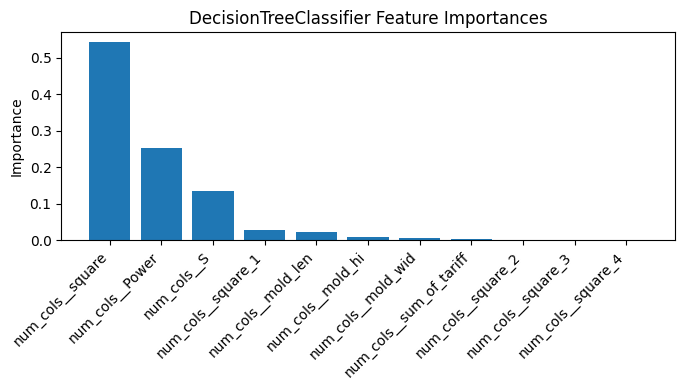

In [55]:
importances = model_xgb.named_steps['model'].feature_importances_
feature_names = model_xgb.named_steps['transform'].get_feature_names_out()
order = np.argsort(importances) [::-1]

# sort high → low

plt.figure(figsize=(7,4))

plt.bar(range(len(order)), importances[order]) 

plt.xticks(range(len(order)),np.array(feature_names) [order],rotation=45, ha='right')

plt.ylabel("Importance")

plt.title("DecisionTreeClassifier Feature Importances")

plt.tight_layout()

plt.show()

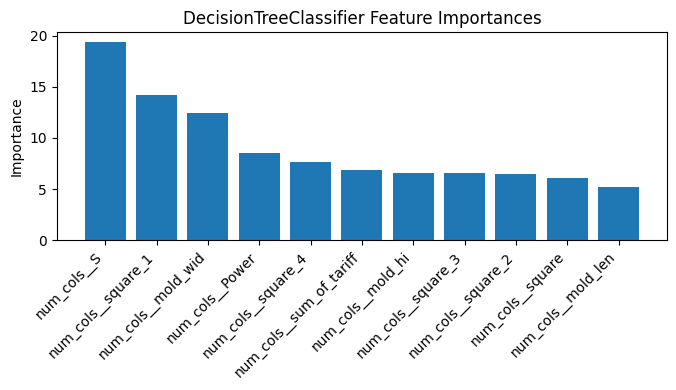

In [56]:
importances = model_cbc.named_steps['model'].feature_importances_
feature_names = model_cbc.named_steps['transform'].get_feature_names_out()
order = np.argsort(importances) [::-1]

# sort high → low

plt.figure(figsize=(7,4))

plt.bar(range(len(order)), importances[order]) 

plt.xticks(range(len(order)),np.array(feature_names) [order],rotation=45, ha='right')

plt.ylabel("Importance")

plt.title("DecisionTreeClassifier Feature Importances")

plt.tight_layout()

plt.show()

In [ ]:
mlflow.set_experiment('xgb_model')
model = mlflow.sklearn.load_model(f'runs:/9cf92d1e212742419919693bce95e75f/xgb')
with open(f"xgb.pkl", "wb") as f:
    cp.dump(model, f)
    

In [71]:
model_path = "xgb.pkl"
with open(model_path, "rb") as f:
    mdl = cp.load(f)
preds = mdl.predict(X_test)
preds

array([29710.504 , 13016.769 , 13058.567 , 17209.293 , 29930.37  ,
       19905.893 , 21452.549 ,  3380.1772,  8668.002 ], dtype=float32)

In [57]:
# importances = model_lgb.named_steps['model'].feature_importances_
# feature_names = model_lgb.named_steps['transform'].get_feature_names_out()
# order = np.argsort(importances) [::-1]

# # sort high → low

# plt.figure(figsize=(7,4))

# plt.bar(range(len(order)), importances[order]) 

# plt.xticks(range(len(order)),np.array(feature_names) [order],rotation=45, ha='right')

# plt.ylabel("Importance")

# plt.title("DecisionTreeClassifier Feature Importances")

# plt.tight_layout()

# plt.show()